### Pandas
- 행과 열로 구성된 표 형식의 데이터 객체를 만들 수 있는 라이브러리
- 데이터 처리와 분석에 최적화 되어있는 라이브러리
- 빅데이터를 처리하는데 매우 편리한 함수를 제공한다.

**pandas의 구조**
- Series Class : 1차원의 데이터
- DataFrame Class : 2차원의 DataFrame을 만들어준다
- 1차원의 Series 클래스가 모여서 2차원의 DataFrame을 만들어준다.

In [49]:
# 라이브러리 import

import pandas as pd

In [50]:
# pandas 설치 코드
# !pip install pandas

### Series 데이터 
- 1차원의 데이터

In [51]:
# 리스트를 이용하는 방식
population = pd.Series([9904312,3448737,2890451,2466052])    # 인덱스가 쫙 하고 보임
population

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

In [52]:
# 딕셔너리를 이용하는 방식
population = pd.Series([9904312,3448737,2890451,2466052],                   
                      index = ['서울','부산','인천','대구'])  #인덱스지정도 가능 
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [53]:
# 딕셔너리(키값,밸류값) 를 이용하는 방식
population = pd.Series({     # 키값은 인덱스/ 벨류값은 값으로 들어감
    "서울" : 9904312,
    "부산" : 3448737,
    "인천" : 2890451,
    "대구" : 2466052
})
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [54]:
#1. 시리즈와 인덱스의 이름을 지정 하기

# 1-1 시리즈의 이름을 지정
population.name = '인구'
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [55]:
#1-2 인덱스의 제목 지정하는 방법
# 나중에 가면 column의 이름이 된다

population.index.name = '도시'  
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [56]:
# 2. 시리즈 데이터 추가, 갱신(수정), 삭제
# 2-1. 데이터 추가(인덱스 확인 후 대입)
population['광주'] = 1420000   # 광주 인덱스에 접근해서 추가해줌
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
광주    1420000
Name: 인구, dtype: int64

In [57]:
# 2-2. 데이터 수정
population['부산'] = 3500000
population

#수정과 추가가 방법이 같음(그니까 넣어주거나 수정할때 있는지 없는지 확인하고 해야됨)

도시
서울    9904312
부산    3500000
인천    2890451
대구    2466052
광주    1420000
Name: 인구, dtype: int64

In [58]:
population['서울'] = 9904312

In [59]:
# 2-3 데이터 삭제
del population['서울']    # 한번 삭제하면 없는걸로 나옴(없다고 에러 뜸)
population

도시
부산    3500000
인천    2890451
대구    2466052
광주    1420000
Name: 인구, dtype: int64

In [60]:
#시리즈의 정보 확인하기
# 1. 시리즈의 값을 확인
population.values

array([3500000, 2890451, 2466052, 1420000], dtype=int64)

In [61]:
# 2. 인덱스 값 확인하기.
population.index

Index(['부산', '인천', '대구', '광주'], dtype='object', name='도시')

In [62]:
# 3. 시리즈의 타입을 확인하기
population.dtype     # pandas라이브러리는 numpy기반으로 만들어져서 어느정도의 명령어를
#                         공유하고 있음

dtype('int64')

In [63]:
# 시리즈의 연산 (오,, 더해짐)
population + population    #시리즈+ 시리즈는 연산이 된다
#                             (같은 인덱스끼리 연산됨)

도시
부산    7000000
인천    5780902
대구    4932104
광주    2840000
Name: 인구, dtype: int64

In [64]:
# 오 그냥 정수 들어가도 연산이 됨 

population / 1000000   

도시
부산    3.500000
인천    2.890451
대구    2.466052
광주    1.420000
Name: 인구, dtype: float64

## Indexing/ slicing

In [65]:
population[3]

1420000

In [66]:
population['광주']

1420000

In [67]:
# pandas는 원하는 인덱스(문자로) 값을 가져오는게 된다

population[['광주','인천','대구']]

도시
광주    1420000
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [68]:
# pandas는 원하는 인덱스(숫자로) 값을 가져오는게 된다
population[[3,1,2]]

도시
광주    1420000
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [69]:
population[1 : 4]

도시
인천    2890451
대구    2466052
광주    1420000
Name: 인구, dtype: int64

### Boolean Indexing

In [70]:
population >= 2500000   # 전체에서 확인

도시
부산     True
인천     True
대구    False
광주    False
Name: 인구, dtype: bool

In [71]:
# Boolean Indexing이 가능하다!
population[population >= 2500000]

도시
부산    3500000
인천    2890451
Name: 인구, dtype: int64

In [72]:
# Q1. 인구수가 200만 이하인 데이터만 가져와보기!
population[population <= 2000000]

도시
광주    1420000
Name: 인구, dtype: int64

In [73]:
# Q2. 인구수가 200만 이상 300만이하인 데이터만 가지고오기!
population[(population >= 2000000) & (population <= 3000000)]


도시
인천    2890451
대구    2466052
Name: 인구, dtype: int64

### DataFrame

In [74]:
# 데이터 프레임 생성 :
# 리스트를 가지고 데이터 프레임을 만들어보자!(엑셀처럼 표를 만들어줌!)

data = [ [9904312,3448737,2890451,2466052 ],
         [9631482,2293191,2632035,2431774 ]]

data_df = pd.DataFrame(data)    #위의 데이터를 데이터프레임에 넣어줄꺼다!
data_df 

,0,1,2,3
0,9904312,3448737,2890451,2466052
1,9631482,2293191,2632035,2431774


In [75]:
data = [ [9904312,3448737,2890451,2466052 ],
         [9631482,2293191,2632035,2431774 ]]

index = ['2015' , '2010']
col = ['서울','부산','인천','대구']


data_df = pd.DataFrame(data,index = index, columns = col )
data_df 

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,2293191,2632035,2431774


In [76]:
# 딕셔너리를 이용한 데이터 프레임 만들기
# 딕셔너리의 키값은 데이터 프레임

data1 = { "2015" : [9904312, 3448737, 2890451, 2466052],
          "2010" : [9631482, 2293191, 2632035, 2431774]}
data1_df = pd.DataFrame(data1)
data1_df

,2015,2010
0,9904312,9631482
1,3448737,2293191
2,2890451,2632035
3,2466052,2431774


In [77]:
# 딕셔너리의 키값은 데이터 프레임
data1 = { "2015" : [9904312, 3448737, 2890451, 2466052],
          "2010" : [9631482, 2293191, 2632035, 2431774] }

data1_df = pd.DataFrame(data1, index = col)   # index는 위에 col 에 있는걸 받아와줌
data1_df

,2015,2010
서울,9904312,9631482
부산,3448737,2293191
인천,2890451,2632035
대구,2466052,2431774


In [78]:
# 전치 : 행과 열의 위치를 바꿔주는 기능
# Transpose(전치하다)
# 위에 위에 있는 data의 행과 열을 바꿔줌
data_df = data_df.T

In [79]:
data_df       #다시 넣어줘야지 그대로 출력이되지 위에꺼 적용시키고 그냥 출력하면
                # 안바뀐다!

,2015,2010
서울,9904312,9631482
부산,3448737,2293191
인천,2890451,2632035
대구,2466052,2431774


In [80]:
# 데이터 프레임에 새로운 컬럼(열) 추가하기

data_df['2020'] = [9562546, 3512547, 2517680, 2456016]

data_df



,2015,2010,2020
서울,9904312,9631482,9562546
부산,3448737,2293191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2456016


In [81]:
# 데이터 프레임 열 수정하기
data_df['2020'] = [0,0,0,0]

data_df

,2015,2010,2020
서울,9904312,9631482,0
부산,3448737,2293191,0
인천,2890451,2632035,0
대구,2466052,2431774,0


In [82]:
# 데이터 프레임 열 삭제하기

del data_df['2020']     #이건 열만할때
data_df

,2015,2010
서울,9904312,9631482
부산,3448737,2293191
인천,2890451,2632035
대구,2466052,2431774


In [83]:
# 데이터 프레임 행 삭제하기!!
# drop(기준값, axis = 0 or 1) 
# axis : 축 / 0 ,1 의 값만 가지고 있음
# axis 가 0 -> 행의 방향(수직)으로 함수가 작용
# axis가 1 -> 열의 방향(수평)으로 작용

data_df.drop('부산', axis = 0,inplace = True )    # 이건 변수에 넣어주거나 implace를 해주면 다른
                                                # 행에서 바로 적용가능 


https://blog.naver.com/smhrd_official/222830799092

In [84]:
#ㅎ.. 잘못했다 부산 삭제하고 다시 밑으로 붙히는거 이따 꼭 해보기
data_df['부산'] = [3448737, 2293191]

ValueError: Length of values (2) does not match length of index (3)

In [ ]:
data_df 

,2015,2010,부산
인천,2890451,2632035,3448737
대구,2466052,2431774,2293191


In [ ]:
# 데이터 프레임 값 확인
data_df.values

array([[2890451, 2632035],
       [2466052, 2431774]], dtype=int64)

In [ ]:
# 데이터 프레임 인덱스 확인
data_df.index

Index(['인천', '대구'], dtype='object')

In [ ]:
# 데이터 프레임 컬럼 확인
data_df.columns

Index(['2015', '2010'], dtype='object')

In [ ]:
# 데이터 프레임 인덱싱 -> 기존의 인덱싱 방법은 열에 있는 모든 데이터만 가져온다
data_df['2015']

인천    2890451
대구    2466052
Name: 2015, dtype: int64

In [ ]:
# 데이터 프레임 슬라이싱
data_df [ '2015' ]

인천    2890451
대구    2466052
Name: 2015, dtype: int64

In [ ]:
# 데이터 프레임 슬라이싱 -> 기존의 슬라이싱 방법은 행에만 적용이 된다.
data_df['부산' : '대구']
# 우리가 직접 설정해준 인덱스는 끝값을 포함한다(원래 +1 해줘야했었는데~! ) ****매우 중요

,2015,2010,부산
대구,2466052,2431774,2293191


In [ ]:
# 인덱서

# 데이터 프레임 상에서 인덱싱과 슬라이싱을 원활하게 하게 도와주는 도구

# loc : 실제 인덱스명 or 컬럼명을 이용해서 데이터를 가져오는 도구  -> 우리가 만든 인덱스
# iloc : 인덱스 번호를 사용해서 데이터를 가져오는 도구 -> 기존의 인덱스 번호


In [ ]:
data1 = { "2015" : [9904312, 3448737, 2890451, 2466052],
          "2010" : [9631482, 2293191, 2632035, 2431774]}

data1_df = pd.DataFrame(data1,index = col)
data1_df

,2015,2010
서울,9904312,9631482
부산,3448737,2293191
인천,2890451,2632035
대구,2466052,2431774


In [ ]:
# loc[행의 시작값 : 행의 끝 값 , 열의 시작 값 : 열의 끝 값]
# 2010년도 부산과 인천 인구 데이터를 가져와보자
data1_df.loc[ '부산' : '인천', '2010' ]

부산    2293191
인천    2632035
Name: 2010, dtype: int64

In [ ]:
# 서울에서 부산까지의 2015 2010 데이터를 가져와보자

data1_df.loc[ '서울' : '부산', '2015' :  ]

,2015,2010
서울,9904312,9631482
부산,3448737,2293191


In [ ]:
# iloc[행의 시작값 : 행의 끝 값(얜 포함이 안됨) +1 , 열의 시작 값 : 열의 끝 값+ 1]
data1_df.iloc[ 0 : 2 ,0 : 2 ]

,2015,2010
서울,9904312,9631482
부산,3448737,2293191


### 성적표 데이터를 이용해서 loc,iloc에 익숙해져보자

In [ ]:
# 판다스는 불러오기가 좀더 편함(확장자명을 다 가지고 있어서)
# 이거 한글을 인식하는 코덱의 종류를 추가를 안해주면 오류가남
# 기존의 방식이 아닌 utf-8 방식으로 디코딩 할 수 없다는 의미

# 그래서 이걸 encoding이라는 파라미터를 추가해서 적어 넣어주면?
# 한글을 인식하는 코덱의 종류 : (EUC-KR (더 많이 접할듯), cp949)


score = pd.read_csv('./data/score.csv', encoding = 'EUC-KR', index_col = '과목')
score


# 행 - 과목/ 열 - 반

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [ ]:
# 1. 각반에 과학 점수를 가져와주세요

score.loc['과학', :  ]

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [ ]:
# 2. 4반에 사회점수를 가져와주세요(loc 사용해서)

score.loc[ '사회' , '4반' ]


40

In [ ]:
# 3. 2반과 3반의 영어점수를 가지고 오는데, (iloc 사용해주세요)
# score.iloc[ 1 ,1 : 3 ]    #이건 그냥 나오는데 왜지?
score.iloc[ 1 : 2 ,1 : 3 ]    # 이건 데이터 프레임으로 나오고


,2반,3반
과목,,
영어,92,45


In [ ]:
# 데이터프레임으로 나오는건 2차원
# 그냥 나오는건 1차원

In [ ]:
#요렇게 대괄호로 감싸주니까 또 데이터 프레임으로 나오네
# 그 이유는 2차원으로 변형해줬으니까
score.loc[['수학'] , ['1반']]    

,1반
과목,
수학,45


In [ ]:
# 4. 1반 부터 3반까지 수학부터 국어 점수 가져와주세요(iloc 사용)
score.iloc[ : 3 , : 3]

,1반,2반,3반
과목,,,
수학,45,44,73
영어,76,92,45
국어,47,92,45


In [ ]:
# 4. 1반 부터 3반까지 수학부터 국어 점수 가져와주세요(loc 사용)
score.loc[ '수학' : '국어',  : '3반' ]

,1반,2반,3반
과목,,,
수학,45,44,73
영어,76,92,45
국어,47,92,45


In [ ]:
# 전체반의 영어점수 가져오기
score.loc[ '영어' , : ]


1반    76
2반    92
3반    45
4반    69
Name: 영어, dtype: int64

In [ ]:
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [ ]:
# 각 과목별 합계를 구해서 데이터 프레임에 추가를 해보자
score['합계'] = score.loc[ : ,'1반' :'4반' ].sum(axis = 1)  # --> axis의 가본 값은 0임 그래서 연산이 세로방향(행방향)으로 진행이 된거임
                                        # 그래서 1로 바꿔줌
score           # ---> 근데 얘 진행하면 할 수록 계속 더함(그래서 범위를 지정해줘야함)
                # --> loc 로 1반부터 4반까지 지정을 해줘서 얘네만 딱 한번 더하게끔 해줌

,1반,2반,3반,4반,합계
과목,,,,,
수학,45,44,73,39,201
영어,76,92,45,69,282
국어,47,92,45,69,253
사회,92,81,85,40,298
과학,11,79,47,26,163


In [ ]:
# 각 과목별 평균을 구해서 데이터 프레임에 추가를 해보자 (iloc를 사용)

score['평균값'] = score.iloc[ : ,0 :3 ].mean(axis = 1).round()  
                                                #round사용 시 괄호에 몇째 자리인지 넣어주면 소숫점 절삭해줌
score

,1반,2반,3반,4반,합계,평균값
과목,,,,,,
수학,45,44,73,39,201,54.0
영어,76,92,45,69,282,71.0
국어,47,92,45,69,253,61.0
사회,92,81,85,40,298,86.0
과학,11,79,47,26,163,46.0


In [ ]:
# 과목 밑에 반 평균이라는 값을 추가해보자
# loc로 반 평균이라는거에 접근을 해서 있으면 수정할꺼고 없으면 추가할꺼다.

score.loc['반 평균']  = score.loc[ : , : ].mean()
# score['반 평균'] = score.iloc[ : ,0 :3 ].mean().round()  
score

,1반,2반,3반,4반,합계,평균값
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,54.0
영어,76.0,92.0,45.0,69.0,282.0,71.0
국어,47.0,92.0,45.0,69.0,253.0,61.0
사회,92.0,81.0,85.0,40.0,298.0,86.0
과학,11.0,79.0,47.0,26.0,163.0,46.0
반 평균,54.2,77.6,59.0,48.6,239.4,63.6


In [ ]:
# 최대값을 구해주는 함수 : max()
score.max()

1반      92.0
2반      92.0
3반      85.0
4반      69.0
합계     298.0
평균값     86.0
dtype: float64

In [ ]:
# 열별(과목별) 최댓값 구하기
# loc 지정안해주면 합계까지나옴

score.loc[ '수학':'과학' , '1반':'4반' ].max(axis = 1)  # loc 먼저 쓰고 함수 써야하나봄 안그럼 에러남

과목
수학    73.0
영어    92.0
국어    92.0
사회    92.0
과학    79.0
dtype: float64

In [ ]:
# 최솟값을 보여주는 합수 : min()
score.min()    #행별 최소값

1반      11.0
2반      44.0
3반      45.0
4반      26.0
합계     163.0
평균값     46.0
dtype: float64

In [ ]:
# 열별(과목별) 최솟값 구하기
score.loc[ '수학':'과학' , '1반':'4반' ].min(axis = 1)

과목
수학    39.0
영어    45.0
국어    45.0
사회    40.0
과학    11.0
dtype: float64

In [ ]:
# 과목별 가장 큰 값과 작은 값의 차이를 구하세요.
maxArr = score.loc[ '수학':'과학' , '1반':'4반' ].max(axis = 1) 
minArr = score.loc[ '수학':'과학' , '1반':'4반' ].min(axis = 1)
maxArr - minArr

# 위 방법들은 인덱싱해오고~ 축도 설정해주고~ 너무 복잡함

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [ ]:
# 함수 설정
# def 함수이름(매개 변수)
def max_min(df) : 
    return df.max() - df.min()


In [ ]:
# df.apply(함수명 , axis = 0 or 1)  : --> 외부에 있는 함수 받아오는 기능
# 합계/ 반평균 같은 경우는 뺌
# Pandas의 객체에 다른 라이브러리의 함수를 적용하는 방법
# 열 혹은 행에 대해 함수를 적용하게 해주는 함수

score1 = score.loc['수학' : '과학','1반' : '4반' ].apply( max_min ,axis = 1 )
score1

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [ ]:
# 정렬
# sort_index() : 인덱스를 기준으로 정렬해라! 
# sort_values() : 값을 기준으로 정렬해라!

In [ ]:
#  sort_index() -> 오름차순으로 인덱스를 정렬
# 국어같은 경우 국어사전의 순서대로, 영어같은 경우 알파벳 순서대로 정렬 
score.loc['수학' : '과학' , '1반' :'4반'].sort_index()  # 열을 기준으로 정렬됨



,1반,2반,3반,4반
과목,,,,
과학,11.0,79.0,47.0,26.0
국어,47.0,92.0,45.0,69.0
사회,92.0,81.0,85.0,40.0
수학,45.0,44.0,73.0,39.0
영어,76.0,92.0,45.0,69.0


In [ ]:
# ascending = True / False 기본값은 True
# ascending = True -> 오름차순으로 정렬해주세요
# ascending = False -> 내림차순으로 정렬해주세요
score.loc['수학' : '과학' , '1반' :'4반'].sort_index(ascending = False)

,1반,2반,3반,4반
과목,,,,
영어,76.0,92.0,45.0,69.0
수학,45.0,44.0,73.0,39.0
사회,92.0,81.0,85.0,40.0
국어,47.0,92.0,45.0,69.0
과학,11.0,79.0,47.0,26.0


In [ ]:
# sort_values()
# 1. 하나의 밸류를 이용해서 정렬을 하는 방법 
# 2. 하나의 기준으로 전체 데이터 프레임을 정렬하는 방법

In [ ]:
# 1. 하나의 밸류를 이용해서 정렬을 하는 방법
score.loc['수학' : '과학' , '1반'].sort_values()

과목
과학    11.0
수학    45.0
국어    47.0
영어    76.0
사회    92.0
Name: 1반, dtype: float64

In [ ]:
score.loc['수학' : '과학' , '1반'].sort_values(ascending = False) # 내림차순

과목
사회    92.0
영어    76.0
국어    47.0
수학    45.0
과학    11.0
Name: 1반, dtype: float64

In [ ]:
# 합계를 기준으로 오름차순 정렬을 해줄 것이다
score.sort_values(by = '합계')   # 합계는 오름차순으로 정렬이됨 다른 것들은 뒤죽박죽

,1반,2반,3반,4반,합계,평균값
과목,,,,,,
과학,11.0,79.0,47.0,26.0,163.0,46.0
수학,45.0,44.0,73.0,39.0,201.0,54.0
반 평균,54.2,77.6,59.0,48.6,239.4,63.6
국어,47.0,92.0,45.0,69.0,253.0,61.0
영어,76.0,92.0,45.0,69.0,282.0,71.0
사회,92.0,81.0,85.0,40.0,298.0,86.0


In [ ]:
score.sort_values(by =['1반', '3반'] )    # 이렇게하면 1반기준 정렬 +  3반도 정렬
                            # 순차적으로 정렬은 앞에 있는 걸 기준으로 정렬을함
                            # 그리고 뒤에 있는걸 정렬해줌

,1반,2반,3반,4반,합계,평균값
과목,,,,,,
과학,11.0,79.0,47.0,26.0,163.0,46.0
수학,45.0,44.0,73.0,39.0,201.0,54.0
국어,47.0,92.0,45.0,69.0,253.0,61.0
반 평균,54.2,77.6,59.0,48.6,239.4,63.6
영어,76.0,92.0,45.0,69.0,282.0,71.0
사회,92.0,81.0,85.0,40.0,298.0,86.0


In [ ]:
data_list = []
data = {}
data['name'] = '이서연'
data['gender'] = 'F'
data['age'] = 31
data_list.append(data)
data = {}
data['name'] = '김민준'
data['gender'] = 'M'
data['age'] = 38
data_list.append(data)
data = {}
data['name'] = '박지우'
data['gender'] = 'M'
data['age'] = 45
data_list.append(data)
data = {}
data['name'] = '윤지민'
data['gender'] = 'F'
data['age'] = 23
data_list.append(data)
data = {}
data['name'] = '송유진'
data['gender'] = 'F'
data['age'] = 24
data_list.append(data)

df = pd.DataFrame(data_list)


In [ ]:
df

,name,gender,age
0,이서연,F,31
1,김민준,M,38
2,박지우,M,45
3,윤지민,F,23
4,송유진,F,24


In [ ]:
# 이름을 기준으로 오름차순 정렬을 해주세요
df.sort_values(by = 'name')

,name,gender,age
1,김민준,M,38
2,박지우,M,45
4,송유진,F,24
3,윤지민,F,23
0,이서연,F,31


In [ ]:
# 나이를 기준으로 내림차순 정렬을 해주세요
df.sort_values(by = 'age',ascending = False)

,name,gender,age
2,박지우,M,45
1,김민준,M,38
0,이서연,F,31
4,송유진,F,24
3,윤지민,F,23


In [ ]:
# 성별을 기준으로 오름차순 정렬을 한 뒤 나이로 다시 한번 정렬 해주세요 

df.sort_values(by = ['gender' , 'age'] )

,name,gender,age
3,윤지민,F,23
4,송유진,F,24
0,이서연,F,31
1,김민준,M,38
2,박지우,M,45


In [ ]:
# 카테고리 만들기
# 수치형 데이터를 범주형 데이터로 바꿔줘보자!
# 수치형 데이터 -> 1,2,3,4..... 연속된 숫자로 이루어진 데이터 입니다. 
# 범주형 데이터 -> 카테고리(일정한 기준으로) 그룹지어진 데이터 ex. 미성년/청년 .. 

In [ ]:
# 데이터 만들기
age = [1,2,10,21,23,33,37,31,61,20,41,32,99]
bins = [0,19,25,35,60,99]
labels = ["미성년자","청년","중년","장년","노년"]


In [ ]:
# pd.cut(범주화 시켜줄 데이터, 쪼개줄 기준, 범주화된 데이터에 라벨)
cats =  pd.cut(age, bins, labels = labels)

In [ ]:
cats

['미성년자', '미성년자', '미성년자', '청년', '청년', ..., '노년', '청년', '장년', '중년', '노년']
Length: 13
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [ ]:
# 데이터 프레임으로 만들어보자

ageArr = pd.DataFrame(age, columns= ['age'] )
ageArr['age_cat'] = cats        # age_cat이라는 이름으로 cats 데이터를 넣어줄꺼다
ageArr

,age,age_cat
0,1,미성년자
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,33,중년
6,37,장년
7,31,중년
8,61,노년
9,20,청년


In [ ]:
# value_counts()
# 수치형 데이터 value_counts
ageArr['age'].value_counts()   # 수치형의 각 값의 수를 센거다!

1     1
2     1
10    1
21    1
23    1
33    1
37    1
31    1
61    1
20    1
41    1
32    1
99    1
Name: age, dtype: int64

In [ ]:
# 범주형 데이터 value_counts
ageArr['age_cat'].value_counts()   # 범주형이 가지고 있는 각 값을 세줌

미성년자    3
청년      3
중년      3
장년      2
노년      2
Name: age_cat, dtype: int64

### 데이터 프레임의 병합

In [ ]:
# 예제에 사용할 데이터 프레임 만들기
df1 = pd.DataFrame({"A" : ["A0", "A1", "A2", 'A3'],
                    "B" : ['B0', 'B1', 'B2', 'B3'],
                    "C" : ['C0', 'C1', 'C2', 'C3'],
                    "D" : ['D0', 'D1', 'D2', 'D3']},
                    index = [0,1,2,3])

df2 = pd.DataFrame({"A" : ["A4", "A5", "A6", 'A7'],
                    "B" : ['B4', 'B5', 'B6', 'B7'],
                    "C" : ['C4', 'C5', 'C6', 'C7'],
                    "D" : ['D4', 'D5', 'D6', 'D7']},
                    index = [4,5,6,7])

df3 = pd.DataFrame({"A" : ["A8", "A9", "A10", 'A11'],
                    "B" : ['B8', 'B9', 'B10', 'B11'],
                    "C" : ['C8', 'C9', 'C10', 'C11'],
                    "D" : ['D8', 'D9', 'D10', 'D11']},
                    index = [8,9,10,11])

In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [ ]:
# 데이터 프레임 병합 : pd.concat()
# 리스트 안에 데이터 프레임을 엮어줄때 넣고 싶은 순서대로 넣어줘야 한다.
# axis = 0은 그대로 나옴
# NaN은 값이 없다는 뜻
df4 =pd.concat([df1,df2,df3], axis = 1)
df4

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [ ]:
# 비어있는 값(NaN) 채워보기 : fillna(value = 내가 넣고 싶은 문자나 숫자)
df4 = df4.fillna(value = '집')

In [ ]:
df4

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,집,집,집,집,집,집,집,집
1,A1,B1,C1,D1,집,집,집,집,집,집,집,집
2,A2,B2,C2,D2,집,집,집,집,집,집,집,집
3,A3,B3,C3,D3,집,집,집,집,집,집,집,집
4,집,집,집,집,A4,B4,C4,D4,집,집,집,집
5,집,집,집,집,A5,B5,C5,D5,집,집,집,집
6,집,집,집,집,A6,B6,C6,D6,집,집,집,집
7,집,집,집,집,A7,B7,C7,D7,집,집,집,집
8,집,집,집,집,집,집,집,집,A8,B8,C8,D8
9,집,집,집,집,집,집,집,집,A9,B9,C9,D9


In [ ]:
df1 = pd.DataFrame({"A" : ["A0", "A1", "A2", 'A3'],
                    "B" : ['B0', 'B1', 'B2', 'B3'],
                    "C" : ['C0', 'C1', 'C2', 'C3'],
                    "D" : ['D0', 'D1', 'D2', 'D3']},
                    index = [0,1,2,3])
df4 = pd.DataFrame({"B" : ["B2", "B3", "B6", 'A7'],
                    "C" : ['C2', 'C3', 'C6', 'C7'],
                    "D" : ['D2', 'D3', 'D6', 'D7'],
                    "F" : ['F2', 'F3', 'F6', 'F7']},
                    index = [2,3,6,7])

In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df4

,B,C,D,F
2,B2,C2,D2,F2
3,B3,C3,D3,F3
6,B6,C6,D6,F6
7,A7,C7,D7,F7


In [ ]:
# axis =1로 df1과 df4를 병합해보자
# 인덱스값이 겹치는게 있어서 이런식으로 출력이 되는거임
# 여기에서 join이 등장! 
# - Outerjoin = Fulljoin : 데이터값이 있든 말든 NaN 값까지 다 표현해줄꺼야  join = 'outer'
# - Innerjoin : 데이터 값이 있는 것만 볼꺼야  join = 'inner'
pd.concat([df1, df4], axis = 1, join = 'inner')

,A,B,C,D,B,C,D,F
2,A2,B2,C2,D2,B2,C2,D2,F2
3,A3,B3,C3,D3,B3,C3,D3,F3


In [ ]:
# ignore_index : 기존의 인덱스를 무시하고 새로운 인덱스를 부여하는 기능
pd.concat([df1,df4],ignore_index= True)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,C2,D2,F2
5,NaN,B3,C3,D3,F3
6,NaN,B6,C6,D6,F6
7,NaN,A7,C7,D7,F7


## 범죄 현황 데이터
- 2019- 2021년 광주광역시 범죄 현황 데이터를 이용해서 전년대비 지역별 범죄 증감 율을 구해보자

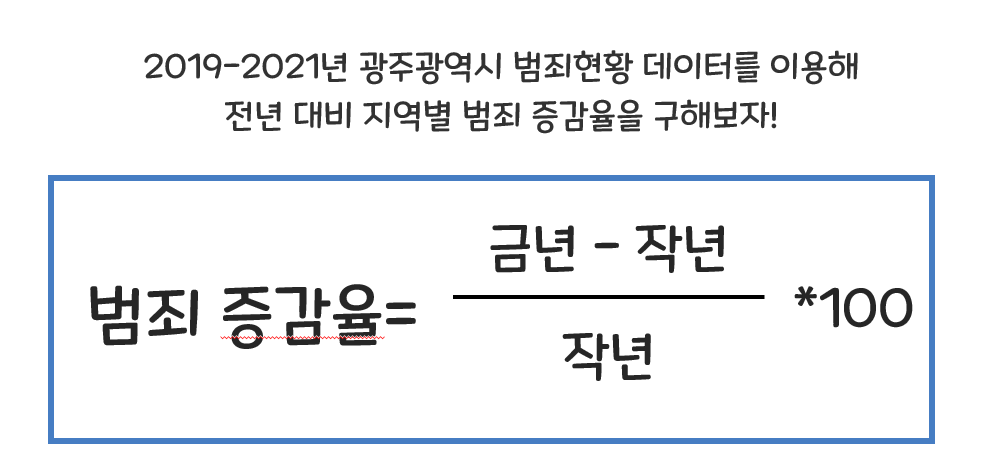

In [ ]:
# 1. 데이터 읽어오기 (3개)

crimi2019 = pd.read_csv('./data/2019.csv', encoding = 'EUC-KR',  index_col = '관서명')
crimi2020 = pd.read_csv('./data/2020.csv', encoding = 'EUC-KR',index_col = '관서명')
crimi2021 = pd.read_csv('./data/2021.csv', encoding = 'EUC-KR',index_col = '관서명')

In [ ]:
crimi2021

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주지방경찰청,발생건수,0,0,0,0,0
광주지방경찰청,검거건수,0,1,91,0,37
광주지방경찰청,검거인원,0,1,105,0,149


In [ ]:
# (.index.unique())
# 2019
# Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명')

# 2020
# Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명'

# 2021
# Index(['광주지방경찰청계', '광주지방경찰청', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서',
#        '광주광산경찰서'],
#       dtype='object', name='관서명')	

# 확인해보니 광주 지방 경찰청만 혼자 있음

In [85]:
# 2. 2021도에만 있는 데이터 삭제 (.index.unique())
# 데이터프레임 행삭제  
# .drop(기준값, axis = 0 or 1) 
crimi2021.drop('광주지방경찰청' ,axis = 0 , inplace = True)
crimi2021.index.unique()

Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명')

In [ ]:
# 열 삭제는
# del 데이터프레임 이름['열이름']

In [86]:
# 3. 데이터 총합 구하고 총합 컬럼 만들어주기
# 2019 
crimi2019['합계'] = crimi2019.loc[ : , '살인' :'폭력' ].sum(axis = 1)

crimi2019


,구분,살인,강도,강간·강제추행,절도,폭력,합계
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주지방경찰청계,검거건수,18,47,758,5409,8301,14533
광주지방경찰청계,검거인원,17,66,776,3433,11774,16066
광주지방경찰청계,구속,9,33,42,104,58,246
광주지방경찰청계,불구속,1,26,511,2781,5618,8937
광주지방경찰청계,기타,7,7,223,548,6098,6883
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주동부경찰서,검거건수,4,6,86,583,970,1649
광주동부경찰서,검거인원,4,7,98,447,1483,2039


In [91]:
# 2020
crimi2020['합계'] = crimi2020.loc[ : , '살인' :'폭력' ].sum(axis = 1)

crimi2020

,구분,살인,강도,강간·강제추행,절도,폭력,합계
관서명,,,,,,,
광주지방경찰청계,발생건수,17,47,701,6052,8599,15416
광주지방경찰청계,검거건수,18,47,713,4242,7631,12651
광주지방경찰청계,검거인원,21,54,758,3455,10747,15035
광주지방경찰청계,구속,14,25,37,132,57,265
광주지방경찰청계,불구속,3,25,491,2862,5267,8648
광주지방경찰청계,기타,4,4,230,461,5423,6122
광주동부경찰서,발생건수,3,8,83,832,1142,2068
광주동부경찰서,검거건수,3,7,70,679,1002,1761
광주동부경찰서,검거인원,4,10,71,543,1497,2125


In [92]:
# 2021
crimi2021['합계'] = crimi2021.loc[ : , '살인' :'폭력' ].sum(axis = 1)

crimi2021

,구분,살인,강도,강간·강제추행,절도,폭력,합계
관서명,,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366,13949
광주지방경찰청계,검거건수,9,32,732,3487,7553,11813
광주지방경찰청계,검거인원,10,61,824,3046,11018,14959
광주지방경찰청계,구속,8,28,71,115,88,310
광주지방경찰청계,불구속,0,26,523,2493,5235,8277
광주지방경찰청계,기타,2,7,230,438,5695,6372
광주동부경찰서,발생건수,3,5,77,624,1090,1799
광주동부경찰서,검거건수,3,5,70,470,953,1501
광주동부경찰서,검거인원,4,4,76,483,1538,2105


In [93]:
# 4. 구분이 발생 건수인 값들만 가져오기(구분 == 발생건수)
# 2019          crimi2019['구분'] == '발생건수'
crimi2019_bal = crimi2019[crimi2019.loc[ : ,'구분'] == '발생건수']
crimi2019_bal

,구분,살인,강도,강간·강제추행,절도,폭력,합계
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주서부경찰서,발생건수,5,10,172,2050,2483,4720
광주남부경찰서,발생건수,1,3,70,962,1081,2117
광주북부경찰서,발생건수,5,14,256,2570,2621,5466
광주광산경찰서,발생건수,4,12,160,1743,2253,4172


In [94]:
#2020
crimi2020_bal = crimi2020[crimi2020.loc[ : ,'구분'] == '발생건수']
crimi2020_bal

,구분,살인,강도,강간·강제추행,절도,폭력,합계
관서명,,,,,,,
광주지방경찰청계,발생건수,17,47,701,6052,8599,15416
광주동부경찰서,발생건수,3,8,83,832,1142,2068
광주서부경찰서,발생건수,2,11,174,1417,2288,3892
광주남부경찰서,발생건수,1,4,64,768,1028,1865
광주북부경찰서,발생건수,6,7,205,1788,2142,4148
광주광산경찰서,발생건수,5,17,175,1247,1999,3443


In [95]:
#2021
crimi2021_bal = crimi2021[crimi2021.loc[ : ,'구분'] == '발생건수']
crimi2021_bal

,구분,살인,강도,강간·강제추행,절도,폭력,합계
관서명,,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366,13949
광주동부경찰서,발생건수,3,5,77,624,1090,1799
광주서부경찰서,발생건수,0,7,196,1142,2293,3638
광주남부경찰서,발생건수,0,4,68,577,898,1547
광주북부경찰서,발생건수,3,5,215,1546,2176,3945
광주광산경찰서,발생건수,3,12,169,927,1909,3020


In [96]:
# 5. 총합이라는 열만 가져오기(시리즈 형태로)
# 2019              crimi2019_bal['합계']
crimi2019_sumcol = crimi2019_bal.loc[ : , '합계' ]
crimi2019_sumcol

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
Name: 합계, dtype: int64

In [97]:
# 2020
crimi2020_sumcol = crimi2020_bal.loc[ : , '합계' ]
crimi2020_sumcol

관서명
광주지방경찰청계    15416
광주동부경찰서      2068
광주서부경찰서      3892
광주남부경찰서      1865
광주북부경찰서      4148
광주광산경찰서      3443
Name: 합계, dtype: int64

In [98]:
# 2021
crimi2021_sumcol = crimi2021_bal.loc[ : , '합계' ]
crimi2021_sumcol

관서명
광주지방경찰청계    13949
광주동부경찰서      1799
광주서부경찰서      3638
광주남부경찰서      1547
광주북부경찰서      3945
광주광산경찰서      3020
Name: 합계, dtype: int64

In [99]:
# 6. 5번에서 만든 시리즈 데이터 이름 변경해주기(2019 총계 , 2020 총계,2021 총계)
# 2019
crimi2019_sumcol.name = '2019 총계'

In [100]:
#2020
crimi2020_sumcol.name = '2020 총계'

In [101]:
#2021
crimi2021_sumcol.name ='2021 총계'

In [102]:
# 7-1 전년대비 증감률 계산하기
#2019 - 2020
updown_1 = ((crimi2020_sumcol- crimi2019_sumcol)/crimi2019_sumcol )*100
updown_1

관서명
광주지방경찰청계   -18.130643
광주동부경찰서    -12.186837
광주서부경찰서    -17.542373
광주남부경찰서    -11.903637
광주북부경찰서    -24.112697
광주광산경찰서    -17.473634
dtype: float64

In [103]:
#2020 - 2021
updown_2 = ((crimi2021_sumcol- crimi2020_sumcol)/crimi2021_sumcol) *100
updown_2

관서명
광주지방경찰청계   -10.516883
광주동부경찰서    -14.952752
광주서부경찰서     -6.981858
광주남부경찰서    -20.555915
광주북부경찰서     -5.145754
광주광산경찰서    -14.006623
dtype: float64

In [104]:
# 7-2 이름 변경해주기(2019-2020 증감율, 2020-2021 증감율)
# 2019-2020 증감율
updown_1.name = '2019-2020 증감률'

In [105]:
# 2020-2021 증감율
updown_2.name = '2020-2021 증감률'

In [108]:
# 8. 행 기준 데이터 병합하기
merge_hang =pd.concat([crimi2019_sumcol,updown_1,crimi2020_sumcol,updown_2 ,crimi2021_sumcol ], axis = 1)
merge_hang

,2019 총계,2019-2020 증감률,2020 총계,2020-2021 증감률,2021 총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-10.516883,13949
광주동부경찰서,2355,-12.186837,2068,-14.952752,1799
광주서부경찰서,4720,-17.542373,3892,-6.981858,3638
광주남부경찰서,2117,-11.903637,1865,-20.555915,1547
광주북부경찰서,5466,-24.112697,4148,-5.145754,3945
광주광산경찰서,4172,-17.473634,3443,-14.006623,3020


In [110]:
# 번외 csv 파일로 저장하기(선생님이랑)
# 번외 csv 파일로 저장.
# to_csv : csv파일로 데이터를 저장하는 코드 euc-kr은 한글이 있을때 사용
merge_hang.to_csv("./data/범죄율증감률.csv",encoding ='euc-kr')
